In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [68]:
df_orignal=pd.read_csv("Suicide_Detection.csv")

In [69]:
df1 = df_orignal.copy()

In [70]:
df1.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [72]:
df1.columns

Index(['Unnamed: 0', 'text', 'class'], dtype='object')

In [73]:
df = df1[['text','class']].rename(columns={'text': 'text', 'class': 'classification'})

In [74]:
df.head()

,text,classification
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [75]:
df.describe().T

,count,unique,top,freq
text,232074,232074,I still haven't beaten the first boss in Hollo...,1
classification,232074,2,suicide,116037


In [76]:
df.classification.unique()

array(['suicide', 'non-suicide'], dtype=object)

In [77]:
df.shape

(232074, 2)

In [78]:
len(df[df.duplicated()])

0

In [79]:
df["text"]=df["text"].str.lower()

In [80]:
df["text"]

0         ex wife threatening suiciderecently i left my ...
1         am i weird i don't get affected by compliments...
2         finally 2020 is almost over... so i can never ...
3                 i need helpjust help me im crying so hard
4         i’m so losthello, my name is adam (16) and i’v...
                                ...                        
232069    if you don't like rock then your not going to ...
232070    you how you can tell i have so many friends an...
232071    pee probably tastes like salty tea😏💦‼️ can som...
232072    the usual stuff you find herei'm not posting t...
232073    i still haven't beaten the first boss in hollo...
Name: text, Length: 232074, dtype: object

In [81]:
df["text"][0]

"ex wife threatening suiciderecently i left my wife for good because she has cheated on me twice and lied to me so much that i have decided to refuse to go back to her. as of a few days ago, she began threatening suicide. i have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe i'll come back. i know a lot of people will threaten this in order to get their way, but what happens if she really does? what do i do and how am i supposed to handle her death on my hands? i still love my wife but i cannot deal with getting cheated on again and constantly feeling insecure. i'm worried today may be the day she does it and i hope so much it doesn't happen."

In [82]:
df["text"]  = df["text"].str.replace('http\S+|www.\S+', '', case=False)

In [83]:
import string
def remove_punctuations(text):
  for punctuation in string.punctuation:
    text = text.replace(punctuation, "")
  return text

In [84]:
df["clean_text"] = df["text"].apply(remove_punctuations)

In [85]:
df["clean_text"]

0         ex wife threatening suiciderecently i left my ...
1         am i weird i dont get affected by compliments ...
2         finally 2020 is almost over so i can never hea...
3                 i need helpjust help me im crying so hard
4         i’m so losthello my name is adam 16 and i’ve b...
                                ...                        
232069    if you dont like rock then your not going to g...
232070    you how you can tell i have so many friends an...
232071    pee probably tastes like salty tea😏💦‼️ can som...
232072    the usual stuff you find hereim not posting th...
232073    i still havent beaten the first boss in hollow...
Name: clean_text, Length: 232074, dtype: object

In [86]:
df["clean_text"] = df["clean_text"].str.replace("[^a-zA-Z#//]"," ")

In [87]:
df["clean_text"]

0         ex wife threatening suiciderecently i left my ...
1         am i weird i dont get affected by compliments ...
2         finally 2020 is almost over so i can never hea...
3                 i need helpjust help me im crying so hard
4         i’m so losthello my name is adam 16 and i’ve b...
                                ...                        
232069    if you dont like rock then your not going to g...
232070    you how you can tell i have so many friends an...
232071    pee probably tastes like salty tea😏💦‼️ can som...
232072    the usual stuff you find hereim not posting th...
232073    i still havent beaten the first boss in hollow...
Name: clean_text, Length: 232074, dtype: object

In [88]:
df["clean_text"] = df["clean_text"].str.replace("\n", " ")

In [89]:
df["clean_text"]

0         ex wife threatening suiciderecently i left my ...
1         am i weird i dont get affected by compliments ...
2         finally 2020 is almost over so i can never hea...
3                 i need helpjust help me im crying so hard
4         i’m so losthello my name is adam 16 and i’ve b...
                                ...                        
232069    if you dont like rock then your not going to g...
232070    you how you can tell i have so many friends an...
232071    pee probably tastes like salty tea😏💦‼️ can som...
232072    the usual stuff you find hereim not posting th...
232073    i still havent beaten the first boss in hollow...
Name: clean_text, Length: 232074, dtype: object

In [90]:
df["clean_text"][0]

'ex wife threatening suiciderecently i left my wife for good because she has cheated on me twice and lied to me so much that i have decided to refuse to go back to her as of a few days ago she began threatening suicide i have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe ill come back i know a lot of people will threaten this in order to get their way but what happens if she really does what do i do and how am i supposed to handle her death on my hands i still love my wife but i cannot deal with getting cheated on again and constantly feeling insecure im worried today may be the day she does it and i hope so much it doesnt happen'

In [91]:
import nltk
from nltk.corpus import words
from nltk.corpus import stopwords

In [92]:
df.head()

,text,classification,clean_text
0,ex wife threatening suiciderecently i left my ...,suicide,ex wife threatening suiciderecently i left my ...
1,am i weird i don't get affected by compliments...,non-suicide,am i weird i dont get affected by compliments ...
2,finally 2020 is almost over... so i can never ...,non-suicide,finally 2020 is almost over so i can never hea...
3,i need helpjust help me im crying so hard,suicide,i need helpjust help me im crying so hard
4,"i’m so losthello, my name is adam (16) and i’v...",suicide,i’m so losthello my name is adam 16 and i’ve b...


In [93]:
#Importing Stop-words
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/srmist9/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
def remove_stopwords(stuff):
  stuff = [word.lower() for word in stuff.split() if word.lower() not in stop]
  return (stuff)

In [95]:
from nltk.stem.porter import*
stemmer = PorterStemmer()

In [96]:
def stemming(stuff):
  text = [stemmer.stem(word) for word in stuff]
  return (" ".join(stuff))

In [97]:
import os
import pickle

# File to save/load the stemmed text
pickle_file = "stemmed_text.pkl"

# Check if the pickle file already exists
if os.path.exists(pickle_file):
    # Load the DataFrame from the pickle file
    with open(pickle_file, "rb") as file:
        df = pickle.load(file)
    print("Loaded DataFrame from pickle file.")
else:

    df["clean_text"] = df["clean_text"].apply(lambda x: remove_stopwords(x))
    df["clean_text"][6]
    
    # Perform stemming if pickle file does not exist
    df["stemmed"] = df["clean_text"].apply(lambda x: stemming(x))
    
    # Save the DataFrame with the stemmed text to a pickle file
    with open(pickle_file, "wb") as file:
        pickle.dump(df, file)
    print("Stemmed text saved to pickle file.")

# Display the first 5 rows of the stemmed column
print(df["stemmed"].head())

Loaded DataFrame from pickle file.
0    ex wife threatening suiciderecently left wife ...
1    weird dont get affected compliments coming som...
2    finally 2020 almost never hear 2020 bad year e...
3                    need helpjust help im crying hard
4    i’m losthello name adam 16 i’ve struggling yea...
Name: stemmed, dtype: object


In [98]:
df.stemmed.head

<bound method NDFrame.head of 0         ex wife threatening suiciderecently left wife ...
1         weird dont get affected compliments coming som...
2         finally 2020 almost never hear 2020 bad year e...
3                         need helpjust help im crying hard
4         i’m losthello name adam 16 i’ve struggling yea...
                                ...                        
232069    dont like rock going get anything go httpsmusi...
232070    tell many friends lonely everything deprived p...
232071    pee probably tastes like salty tea😏💦‼️ someone...
232072    usual stuff find hereim posting sympathy pity ...
232073    still havent beaten first boss hollow knight i...
Name: stemmed, Length: 232074, dtype: object>

In [99]:
from nltk import wsd
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import wordnet as wn
from spacy.cli import download
from spacy import load
import warnings

nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('wordnet2022')
# nlp = load('en_core_web_sm')

! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet # temp fix for lookup error.

cp: cannot stat '/usr/share/nltk_data/corpora/wordnet2022': No such file or directory


[nltk_data] Downloading package omw-1.4 to /home/srmist9/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/srmist9/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to
[nltk_data]     /home/srmist9/nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!


In [100]:
import os
import pickle
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# File to save/load the lemmatized text
pickle_file = "lemmatized_text.pkl"

# Check if the pickle file already exists
if os.path.exists(pickle_file):
    # Load the DataFrame from the pickle file
    with open(pickle_file, "rb") as file:
        df = pickle.load(file)
    print("Loaded DataFrame with lemmatized text from pickle file.")
else:
    # Perform lemmatization if pickle file does not exist
    df['lemmed'] = df['clean_text'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
    
    # Save the DataFrame with the lemmatized text to a pickle file
    with open(pickle_file, "wb") as file:
        pickle.dump(df, file)
    print("Lemmatized text saved to pickle file.")

# Display the first 5 rows of the lemmatized column
print(df['lemmed'].head())

Loaded DataFrame with lemmatized text from pickle file.
0    [ex, wife, threatening, suiciderecently, left,...
1    [weird, dont, get, affected, compliment, comin...
2    [finally, 2020, almost, never, hear, 2020, bad...
3                [need, helpjust, help, im, cry, hard]
4    [i’m, losthello, name, adam, 16, i’ve, struggl...
Name: lemmed, dtype: object


In [101]:
df.head()

,text,classification,clean_text,stemmed,lemmed
0,ex wife threatening suiciderecently i left my ...,suicide,"[ex, wife, threatening, suiciderecently, left,...",ex wife threatening suiciderecently left wife ...,"[ex, wife, threatening, suiciderecently, left,..."
1,am i weird i don't get affected by compliments...,non-suicide,"[weird, dont, get, affected, compliments, comi...",weird dont get affected compliments coming som...,"[weird, dont, get, affected, compliment, comin..."
2,finally 2020 is almost over... so i can never ...,non-suicide,"[finally, 2020, almost, never, hear, 2020, bad...",finally 2020 almost never hear 2020 bad year e...,"[finally, 2020, almost, never, hear, 2020, bad..."
3,i need helpjust help me im crying so hard,suicide,"[need, helpjust, help, im, crying, hard]",need helpjust help im crying hard,"[need, helpjust, help, im, cry, hard]"
4,"i’m so losthello, my name is adam (16) and i’v...",suicide,"[i’m, losthello, name, adam, 16, i’ve, struggl...",i’m losthello name adam 16 i’ve struggling yea...,"[i’m, losthello, name, adam, 16, i’ve, struggl..."


In [102]:
classification_counts = df['classification'].value_counts().reset_index()
classification_counts.columns = ['Classification', 'Count']
print(classification_counts)

  Classification   Count
0        suicide  116037
1    non-suicide  116037


Text(0, 0.5, 'Count')

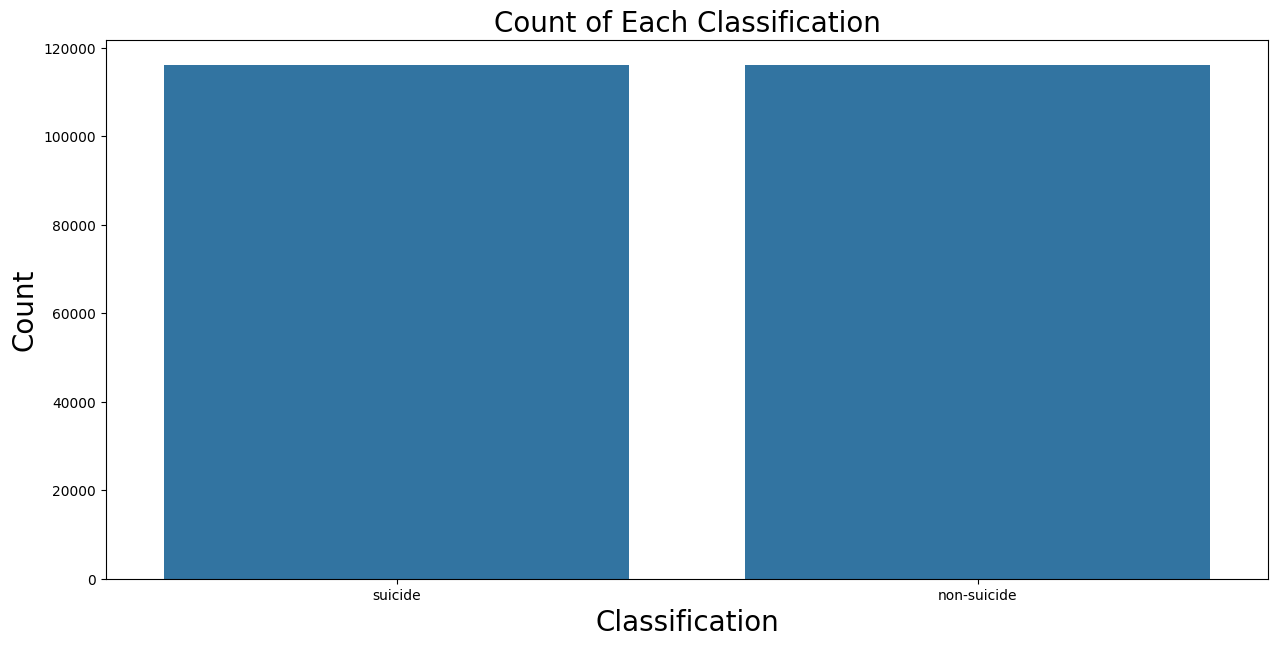

In [103]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x='Classification', y='Count', data=classification_counts)
ax.set_title("Count of Each Classification", fontsize=20)
ax.set_xlabel("Classification", fontsize=20)
ax.set_ylabel("Count", fontsize=20)

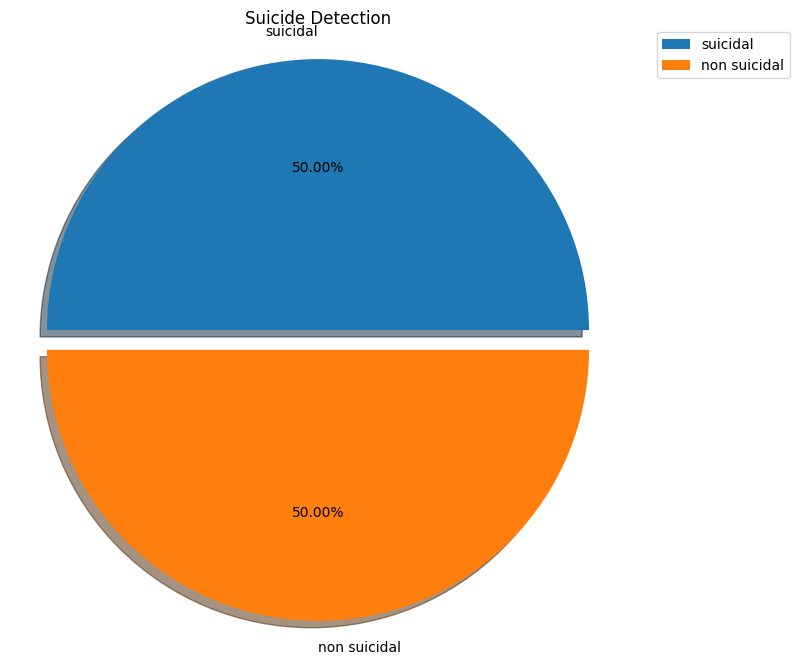

In [104]:
classification_count1 = df["classification"].value_counts().to_list()
labels=["suicidal","non suicidal"]
plt.figure(figsize = [10,8])
plt.pie(x=classification_count1,explode=[0.04,0.04],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Suicide Detection")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", borderaxespad=0)
plt.show()

In [105]:
df['temp_list'] = df['clean_text'].apply(lambda x:str(x).split())

In [106]:
from collections import Counter
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Reds')

,Common_words,count
0,"'im',",241018
1,"'like',",179022
2,"'dont',",156100
3,"'want',",142693
4,"'know',",127178
5,"'feel',",118793
6,"'life',",115594
7,"'get',",109187
8,"'people',",91083
9,"'even',",90340


In [107]:
#seperating the sentiments for word cloud
suicide = pd.DataFrame(df[['stemmed','lemmed']]  [df['classification'] == 'suicide'])
nonsuicide = pd.DataFrame(df[['stemmed','lemmed']]  [df['classification'] == 'non-suicide'])

In [108]:
# Define figure size (rectangle)
width, height = 800, 400  # Adjust as needed


In [109]:
# Create a plain white rectangular mask
mask = np.ones((height, width), dtype=np.uint8) * 255  # White rectangle



In [110]:
# Generate WordCloud
wc = WordCloud(
    background_color='white',
    width=width,
    height=height,
    contour_width=1,
    contour_color='steelblue'
)



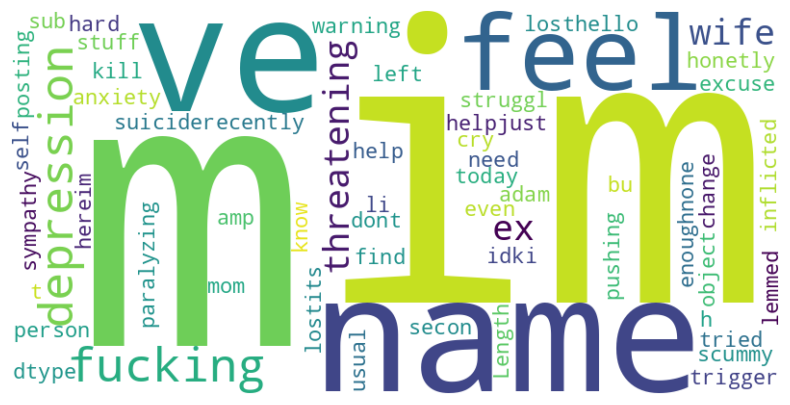

In [111]:
wc.generate(str(suicide['lemmed']))

# Display the WordCloud
plt.figure(figsize=(10, 5))  # Adjust as needed
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

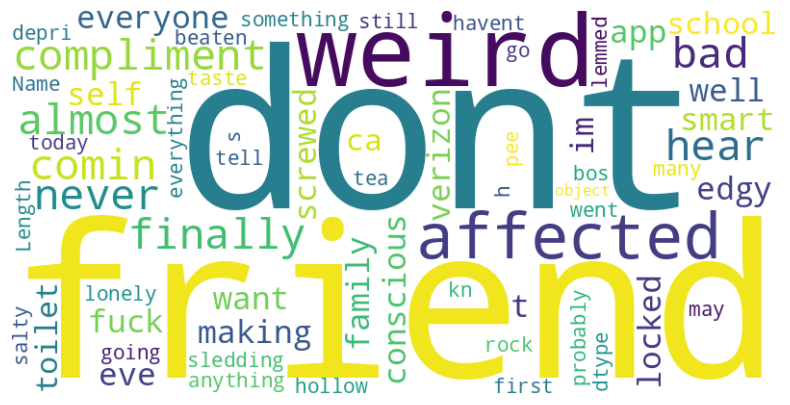

In [112]:
wc.generate(str(nonsuicide['lemmed']))

# Display the WordCloud
plt.figure(figsize=(10, 5))  # Adjust as needed
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [113]:
x=df["lemmed"]
y=df["classification"]

In [114]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=10)

In [115]:
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print("Train-test split completed.")

Train-test split completed.


In [116]:
print(x_train.shape)
y_test.shape

(185659,)


(46415,)

In [117]:
print(x_train.head())
y_train.head()

0    [random, thought, monday, take, 3, guy, ever, ...
1    , bored, hell, looking, friend, hey, alrig...
2    [stay, dad, 2, day, maybe, get, high, sorry, i...
3                                  [woke, thigh, sore]
4    [two, hour, fuckening, got, 6, geography, toda...
Name: lemmed, dtype: object


0    non-suicide
1    non-suicide
2    non-suicide
3    non-suicide
4    non-suicide
Name: classification, dtype: object

In [118]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# File paths for saving the vectorizers and transformed data
cv_pickle_file = "count_vectorizer.pkl"
tv_pickle_file = "tfidf_vectorizer.pkl"
cv_train_data_file = "cv_x_train.pkl"
tv_train_data_file = "tv_x_train.pkl"

# Check if the vectorizers and transformed data already exist
if all([os.path.exists(cv_pickle_file), os.path.exists(tv_pickle_file), 
        os.path.exists(cv_train_data_file), os.path.exists(tv_train_data_file)]):
    # Load the vectorizers and transformed data
    with open(cv_pickle_file, "rb") as file:
        cv = pickle.load(file)
    with open(tv_pickle_file, "rb") as file:
        tv = pickle.load(file)
    with open(cv_train_data_file, "rb") as file:
        cv_x_train = pickle.load(file)
    with open(tv_train_data_file, "rb") as file:
        tv_x_train = pickle.load(file)
    print("Loaded CountVectorizer, TfidfVectorizer, and transformed data from pickle files.")
else:
    # Initialize and fit the vectorizers
    cv = CountVectorizer(binary=False, max_df=1.0, min_df=5, ngram_range=(1, 2))
    cv_x_train = cv.fit_transform(x_train.astype(str).str.strip())
    
    tv = TfidfVectorizer(use_idf=True, max_df=1.0, min_df=5, ngram_range=(1, 2), sublinear_tf=True)
    tv_x_train = tv.fit_transform(x_train.astype(str).str.strip())
    
    # Save the vectorizers and transformed data to pickle files
    with open(cv_pickle_file, "wb") as file:
        pickle.dump(cv, file)
    with open(tv_pickle_file, "wb") as file:
        pickle.dump(tv, file)
    with open(cv_train_data_file, "wb") as file:
        pickle.dump(cv_x_train, file)
    with open(tv_train_data_file, "wb") as file:
        pickle.dump(tv_x_train, file)
    print("Saved CountVectorizer, TfidfVectorizer, and transformed data to pickle files.")

# Transform the test data using the loaded or newly fitted vectorizers
cv_x_test = cv.transform(x_test.astype(str).str.strip())
tv_x_test = tv.transform(x_test.astype(str).str.strip())

# Display the shapes of the transformed data
print("cv_x_train shape:", cv_x_train.shape)
print("tv_x_train shape:", tv_x_train.shape)
print("cv_x_test shape:", cv_x_test.shape)
print("tv_x_test shape:", tv_x_test.shape)

Loaded CountVectorizer, TfidfVectorizer, and transformed data from pickle files.


cv_x_train shape: (185659, 336701)
tv_x_train shape: (185659, 336701)
cv_x_test shape: (46415, 336701)
tv_x_test shape: (46415, 336701)


Bert

In [119]:
# import pandas as pd
# import numpy as np
# import torch
# import torch.nn as nn
# from torch.utils.data import Dataset, DataLoader, RandomSampler
# from transformers import BertTokenizer, BertForSequenceClassification
# import torch.optim as optim
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns
# import time
# import os
# import pickle
# from tqdm import tqdm

# # Check for GPU availability
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# # =====================
# # STEP 1: Dataset Class
# # =====================
# class SuicideTextDataset(Dataset):
#     def __init__(self, texts, labels, tokenizer, max_length=128):
#         self.texts = texts
#         self.labels = labels
#         self.tokenizer = tokenizer
#         self.max_length = max_length
        
#     def __len__(self):
#         return len(self.texts)
    
#     def __getitem__(self, idx):
#         text = str(self.texts[idx])  # Convert to string to handle any non-string inputs
        
#         # Handle lists (from lemmatization)
#         if text.startswith('[') and text.endswith(']'):
#             try:
#                 # Try to join elements if it's a list representation
#                 import ast
#                 text_list = ast.literal_eval(text)
#                 if isinstance(text_list, list):
#                     text = ' '.join([str(item) for item in text_list])
#             except:
#                 # If parsing fails, use the text as is
#                 pass
                
#         encoding = self.tokenizer(
#             text,
#             add_special_tokens=True,
#             max_length=self.max_length,
#             padding='max_length',
#             truncation=True,
#             return_attention_mask=True,
#             return_tensors='pt'
#         )
        
#         return {
#             'input_ids': encoding['input_ids'].flatten(),
#             'attention_mask': encoding['attention_mask'].flatten(),
#             'label': torch.tensor(self.labels[idx], dtype=torch.long)
#         }

# # =====================
# # STEP 2: Data Preparation
# # =====================
# def prepare_data(x_train, x_test, y_train, y_test):
#     # Convert classification labels to binary format
#     label_encoder = LabelEncoder()
#     y_train_encoded = label_encoder.fit_transform(y_train)
#     y_test_encoded = label_encoder.transform(y_test)
    
#     print(f"Label mapping: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")
    
#     # Initialize tokenizer
#     tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    
#     # Create datasets
#     train_dataset = SuicideTextDataset(x_train, y_train_encoded, tokenizer)
#     test_dataset = SuicideTextDataset(x_test, y_test_encoded, tokenizer)
    
#     # Create dataloaders
#     batch_size = 32
#     train_loader = DataLoader(
#         train_dataset,
#         batch_size=batch_size,
#         sampler=RandomSampler(train_dataset),
#         num_workers=4
#     )
    
#     test_loader = DataLoader(
#         test_dataset,
#         batch_size=batch_size,
#         num_workers=4
#     )
    
#     return train_loader, test_loader, label_encoder

# # =====================
# # STEP 3: Training Function
# # =====================
# def train_model(train_loader, epochs=3):
#     # Initialize model
#     model = BertForSequenceClassification.from_pretrained(
#         'bert-base-uncased',
#         num_labels=2,
#         output_attentions=False,
#         output_hidden_states=False
#     )
#     model.to(device)
    
#     # Optimizer and learning rate scheduler
#     optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
#     total_steps = len(train_loader) * epochs
#     scheduler = get_linear_schedule_with_warmup(
#         optimizer,
#         num_warmup_steps=0,
#         num_training_steps=total_steps
#     )
    
#     # Training loop
#     start_time = time.time()
#     best_model_path = "best_bert_model.pt"
#     best_loss = float('inf')
    
#     for epoch in range(epochs):
#         print(f"\nEpoch {epoch+1}/{epochs}")
#         print('-' * 30)
        
#         model.train()
#         total_loss = 0
        
#         progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}")
#         for batch in progress_bar:
#             # Move batch to device
#             input_ids = batch['input_ids'].to(device)
#             attention_mask = batch['attention_mask'].to(device)
#             labels = batch['label'].to(device)
            
#             # Clear gradients
#             model.zero_grad()
            
#             # Forward pass
#             outputs = model(
#                 input_ids=input_ids,
#                 attention_mask=attention_mask,
#                 labels=labels
#             )
            
#             loss = outputs.loss
#             total_loss += loss.item()
            
#             # Backward pass
#             loss.backward()
            
#             # Gradient clipping to prevent exploding gradients
#             torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
#             # Update parameters
#             optimizer.step()
#             scheduler.step()
            
#             # Update progress bar
#             progress_bar.set_postfix({'loss': f"{loss.item():.4f}"})
        
#         avg_loss = total_loss / len(train_loader)
#         print(f"Average training loss: {avg_loss:.4f}")
        
#         # Save best model
#         if avg_loss < best_loss:
#             best_loss = avg_loss
#             torch.save(model.state_dict(), best_model_path)
#             print(f"Saved best model with loss: {best_loss:.4f}")
    
#     train_time = time.time() - start_time
#     print(f"Training complete! Time taken: {train_time:.2f} seconds")
    
#     # Load best model
#     model.load_state_dict(torch.load(best_model_path))
#     return model

# # =====================
# # STEP 4: Evaluation Function
# # =====================
# def evaluate_model(model, test_loader, label_encoder):
#     model.eval()
#     all_preds = []
#     all_labels = []
    
#     start_time = time.time()
    
#     with torch.no_grad():
#         for batch in tqdm(test_loader, desc="Evaluating"):
#             input_ids = batch['input_ids'].to(device)
#             attention_mask = batch['attention_mask'].to(device)
#             labels = batch['label'].to(device)
            
#             outputs = model(
#                 input_ids=input_ids,
#                 attention_mask=attention_mask
#             )
            
#             # Get predictions
#             logits = outputs.logits
#             preds = torch.argmax(logits, dim=1)
            
#             # Add to lists
#             all_preds.extend(preds.cpu().tolist())
#             all_labels.extend(labels.cpu().tolist())
    
#     test_time = time.time() - start_time
    
#     # Calculate metrics
#     accuracy = accuracy_score(all_labels, all_preds)
#     precision = precision_score(all_labels, all_preds, average='binary')
#     recall = recall_score(all_labels, all_preds, average='binary')
#     f1 = f1_score(all_labels, all_preds, average='binary')
    
#     print("\n===== Evaluation Results =====")
#     print(f"🔹 Testing Time: {test_time:.2f} seconds")
#     print(f"🔹 Accuracy: {accuracy:.4f}")
#     print(f"🔹 Precision: {precision:.4f}")
#     print(f"🔹 Recall: {recall:.4f}")
#     print(f"🔹 F1 Score: {f1:.4f}")
    
#     # Create confusion matrix
#     conf_matrix = confusion_matrix(all_labels, all_preds)
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
#                 xticklabels=label_encoder.classes_, 
#                 yticklabels=label_encoder.classes_)
#     plt.xlabel("Predicted")
#     plt.ylabel("Actual")
#     plt.title("BERT Confusion Matrix")
#     plt.tight_layout()
#     plt.savefig("bert_confusion_matrix.png")
#     plt.show()
    
#     return {
#         "accuracy": accuracy,
#         "precision": precision,
#         "recall": recall,
#         "f1": f1,
#         "conf_matrix": conf_matrix
#     }

# # =====================
# # STEP 5: Main Execution
# # =====================
# def run_bert_classification(x_train, x_test, y_train, y_test):
#     # Prepare data
#     train_loader, test_loader, label_encoder = prepare_data(x_train, x_test, y_train, y_test)
    
#     # Train model
#     model = train_model(train_loader, epochs=3)
    
#     # Evaluate model
#     metrics = evaluate_model(model, test_loader, label_encoder)
    
#     return model, metrics

# # =====================
# # STEP 6: Prediction Function
# # =====================
# def predict_suicide_risk(text, model, tokenizer):
#     """Function to predict suicide risk for new text"""
#     model.eval()
    
#     # Tokenize input
#     encoding = tokenizer(
#         text,
#         add_special_tokens=True,
#         max_length=128,
#         padding='max_length',
#         truncation=True,
#         return_attention_mask=True,
#         return_tensors='pt'
#     )
    
#     # Move to device
#     input_ids = encoding['input_ids'].to(device)
#     attention_mask = encoding['attention_mask'].to(device)
    
#     # Make prediction
#     with torch.no_grad():
#         outputs = model(input_ids=input_ids, attention_mask=attention_mask)
#         logits = outputs.logits
#         probs = torch.nn.functional.softmax(logits, dim=1)
#         pred_class = torch.argmax(probs, dim=1).cpu().item()
    
#     # Return prediction and probability
#     return {
#         "prediction": "suicide" if pred_class == 1 else "non-suicide",
#         "probability": probs[0][pred_class].cpu().item()
#     }

In [120]:
# import pandas as pd
# import torch
# import torch.nn as nn
# from torch.utils.data import Dataset, DataLoader
# from transformers import BertTokenizer, BertForSequenceClassification
# import torch.optim as optim
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns
# import time

# # ======================
# # STEP 1: Setup
# # ======================
# device = torch.device("cpu")
# print("Using device:", device)

# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2).to(device)

# # ======================
# # STEP 2: Load Data
# # ======================
# train_df = pd.read_csv("train.csv")   # Must have 'text' and 'class'
# test_df = pd.read_csv("test.csv")

# X_train = train_df["text"].tolist()
# y_train = train_df["class"].tolist()

# X_test = test_df["text"].tolist()
# y_test = test_df["class"].tolist()

# label_encoder = LabelEncoder()
# y_train_enc = label_encoder.fit_transform(y_train)
# y_test_enc = label_encoder.transform(y_test)

# # ======================
# # STEP 3: Dataset Class
# # ======================
# class BERTDataset(Dataset):
#     def __init__(self, texts, labels, tokenizer, max_len=256):
#         self.texts = texts
#         self.labels = labels
#         self.tokenizer = tokenizer
#         self.max_len = max_len

#     def __len__(self):
#         return len(self.texts)

#     def __getitem__(self, idx):
#         encoding = self.tokenizer(
#             self.texts[idx],
#             padding='max_length',
#             truncation=True,
#             max_length=self.max_len,
#             return_tensors='pt'
#         )
#         return {
#             'input_ids': encoding['input_ids'].squeeze(0),
#             'attention_mask': encoding['attention_mask'].squeeze(0),
#             'label': torch.tensor(self.labels[idx], dtype=torch.long)
#         }

# # ======================
# # STEP 4: DataLoaders
# # ======================
# train_dataset = BERTDataset(X_train, y_train_enc, tokenizer)
# test_dataset = BERTDataset(X_test, y_test_enc, tokenizer)

# train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=16)

# # ======================
# # STEP 5: Training Loop
# # ======================
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.AdamW(model.parameters(), lr=2e-5)
# epochs = 3

# start_train = time.time()
# for epoch in range(epochs):
#     model.train()
#     total_loss = 0
#     for batch in train_loader:
#         input_ids = batch["input_ids"].to(device)
#         attention_mask = batch["attention_mask"].to(device)
#         labels = batch["label"].to(device)

#         optimizer.zero_grad()
#         outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
#         loss = outputs.loss
#         loss.backward()
#         optimizer.step()
#         total_loss += loss.item()

#     print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")
# end_train = time.time()
# train_time = end_train - start_train

# # ======================
# # STEP 6: Evaluation
# # ======================
# model.eval()
# predictions = []
# true_labels = []

# start_test = time.time()
# with torch.no_grad():
#     for batch in test_loader:
#         input_ids = batch["input_ids"].to(device)
#         attention_mask = batch["attention_mask"].to(device)
#         labels = batch["label"].to(device)

#         outputs = model(input_ids=input_ids, attention_mask=attention_mask)
#         _, preds = torch.max(outputs.logits, dim=1)

#         predictions.extend(preds.cpu().numpy())
#         true_labels.extend(labels.cpu().numpy())
# end_test = time.time()
# test_time = end_test - start_test

# # ======================
# # STEP 7: Metrics
# # ======================
# accuracy = accuracy_score(true_labels, predictions)
# precision = precision_score(true_labels, predictions, average='binary')
# recall = recall_score(true_labels, predictions, average='binary')
# f1 = f1_score(true_labels, predictions, average='binary')

# print(f"\n🔹 Training Time: {train_time:.2f} seconds")
# print(f"🔹 Testing Time: {test_time:.2f} seconds")
# print(f"🔹 Accuracy: {accuracy:.4f}")
# print(f"🔹 Precision: {precision:.4f}")
# print(f"🔹 Recall: {recall:.4f}")
# print(f"🔹 F1 Score: {f1:.4f}")

# # ======================
# # STEP 8: Confusion Matrix
# # ======================
# conf_matrix = confusion_matrix(true_labels, predictions)

# plt.figure(figsize=(5, 4))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
#             xticklabels=label_encoder.classes_,
#             yticklabels=label_encoder.classes_)
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("BERT Confusion Matrix (CPU)")
# plt.savefig("BERT_Confusion_Matrix_CPU.png")
# plt.show()


# BERT Binary Classification for Suicidal Text Detection

This implementation uses the BERT model for binary classification of suicidal text.

In [121]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "5"
import torch
torch.cuda.is_available()

True

In [122]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, RandomSampler
from transformers import BertTokenizer, BertForSequenceClassification, get_linear_schedule_with_warmup
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time
import os
import pickle
import gc

# Function to check available CUDA memory
def check_gpu_memory():
    if torch.cuda.is_available():
        # Get the current device
        device = torch.cuda.current_device()
        # Total memory in GB
        total_memory = torch.cuda.get_device_properties(device).total_memory / (1024**3)
        # Allocated memory in GB
        allocated_memory = torch.cuda.memory_allocated(device) / (1024**3)
        # Reserved memory in GB (this includes allocated + cached memory)
        reserved_memory = torch.cuda.memory_reserved(device) / (1024**3)
        # Free memory in GB (better estimate of truly available memory)
        free_memory = total_memory - reserved_memory
        return {
            "device": torch.cuda.get_device_name(device),
            "total_memory_gb": round(total_memory, 2),
            "allocated_memory_gb": round(allocated_memory, 2),
            "reserved_memory_gb": round(reserved_memory, 2),
            "free_memory_gb": round(free_memory, 2)
        }
    else:
        return {"device": "CPU", "message": "CUDA not available"}

# Determine if we can use GPU based on model size requirements
# BERT base requires ~2.5GB minimum to be safe
min_required_memory_gb = 2.5
use_gpu = torch.cuda.is_available()

if use_gpu:
    memory_info = check_gpu_memory()
    print(f"GPU: {memory_info['device']}")
    print(f"Total Memory: {memory_info['total_memory_gb']} GB")
    print(f"Free Memory: {memory_info['free_memory_gb']} GB")
    
    if memory_info['free_memory_gb'] < min_required_memory_gb:
        print(f"Warning: Less than {min_required_memory_gb}GB GPU memory available. Switching to CPU.")
        use_gpu = False
    else:
        print("Sufficient GPU memory available.")

# Set device
device = torch.device('cuda' if use_gpu else 'cpu')
print(f"Using device: {device}")

GPU: NVIDIA A100-SXM4-40GB
Total Memory: 39.49 GB
Free Memory: 34.57 GB
Sufficient GPU memory available.
Using device: cuda


In [123]:
class SuicidalTextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        # Convert labels to pandas Series to use reset_index
        self.texts = texts.reset_index(drop=True)  # Reset index to avoid KeyError
        self.labels = pd.Series(labels).reset_index(drop=True)  # Convert to Series and reset index
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        try:
            text = str(self.texts[idx])
            label = self.labels[idx]
        except KeyError:
            raise IndexError(f"Index {idx} is out of bounds for the dataset.")

        # Tokenization and preprocessing
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

In [124]:
def prepare_data_for_bert(x_train, x_test, y_train, y_test, batch_size=32):
    # Reduce batch size for memory-constrained environments
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    train_dataset = SuicidalTextDataset(x_train, y_train_encoded, tokenizer)
    test_dataset = SuicidalTextDataset(x_test, y_test_encoded, tokenizer)

    train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    sampler=RandomSampler(train_dataset),
    num_workers=8  # Increase workers
)
    test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    num_workers=8  # Increase workers
)
    return train_loader, test_loader, label_encoder, tokenizer

In [125]:
from torch.amp import GradScaler, autocast  # Updated import

def train_bert_model(train_loader, epochs=3, learning_rate=2e-5):
    model = BertForSequenceClassification.from_pretrained(
        'bert-base-uncased',
        num_labels=2,
        output_attentions=False,
        output_hidden_states=False
    ).to(device)

    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, eps=1e-8)
    total_steps = len(train_loader) * epochs
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=0,
        num_training_steps=total_steps
    )

    # Initialize GradScaler for mixed precision
    scaler = GradScaler('cuda')  # Updated syntax

    print("Starting training with Mixed Precision...")
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}")
        for batch in progress_bar:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()

            # Use autocast for mixed precision
            with autocast('cuda'):  # Updated syntax
                outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss

            # Scale the loss and backpropagate
            scaler.scale(loss).backward()

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            # Step optimizer and scheduler using the scaler
            scaler.step(optimizer)
            scaler.update()
            scheduler.step()

            total_loss += loss.item()
            progress_bar.set_postfix({'loss': f"{loss.item():.4f}"})

    return model

In [126]:
# Function to evaluate the model
def evaluate_bert_model(model, test_loader, label_encoder):
    model.eval()
    all_preds = []
    all_labels = []
    
    print("Starting evaluation...")
    start_time = time.time()
    
    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Evaluating"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            
            # Get predictions
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)
            
            # Save predictions and labels
            all_preds.extend(preds.cpu().tolist())
            all_labels.extend(labels.cpu().tolist())
    
    eval_time = time.time() - start_time
    
    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='binary')
    recall = recall_score(all_labels, all_preds, average='binary')
    f1 = f1_score(all_labels, all_preds, average='binary')
    
    print("\n===== Evaluation Results =====")
    print(f"Evaluation Time: {eval_time:.2f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Create confusion matrix
    conf_matrix = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=label_encoder.classes_, 
                yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("BERT Confusion Matrix")
    plt.tight_layout()
    plt.savefig("bert_suicide_confusion_matrix.png")
    plt.show()
    
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "conf_matrix": conf_matrix
    }

In [127]:
# Function to predict with the trained model
def predict_suicide_risk(text, model, tokenizer):
    """Function to predict suicide risk for new text"""
    model.eval()
    
    # Tokenize input
    encoding = tokenizer(
        text,
        add_special_tokens=True,
        max_length=128,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    
    # Move to device
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)
    
    # Make prediction
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        probs = torch.nn.functional.softmax(logits, dim=1)
        pred_class = torch.argmax(probs, dim=1).cpu().item()
    
    # Return prediction and probability
    return {
        "prediction": "suicide" if pred_class == 1 else "non-suicide",
        "probability": probs[0][pred_class].cpu().item()
    }

In [128]:
# Main execution for BERT model with fallback options
def run_bert_classification(x_train, x_test, y_train, y_test):
    # Use global keyword to modify global variables
    global device, use_gpu
    
    try:
        # Prepare data
        train_loader, test_loader, label_encoder, tokenizer = prepare_data_for_bert(x_train, x_test, y_train, y_test)
        
        # Train model
        model = train_bert_model(train_loader, epochs=2 if use_gpu else 1)  # Use fewer epochs if memory is limited
        
        # Evaluate model
        metrics = evaluate_bert_model(model, test_loader, label_encoder)
        
        # Save model and tokenizer for future use
        torch.save(model.state_dict(), "bert_suicide_model.pt")
        tokenizer.save_pretrained("./bert_suicide_tokenizer")
        
        return model, tokenizer, metrics
        
    except RuntimeError as e:
        if "CUDA out of memory" in str(e):
            print("\n" + "=" * 80)
            print("CUDA OUT OF MEMORY ERROR")
            print("Attempting to run on CPU instead...")
            print("=" * 80 + "\n")
            
            # Clear GPU memory
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
                gc.collect()
            
            # Set global device to CPU
            device = torch.device('cpu')
            use_gpu = False
            
            # Try again with CPU
            return run_bert_classification(x_train, x_test, y_train, y_test)
        else:
            # Re-raise the exception if it's not a CUDA memory error
            raise

In [129]:
import os

# Set the environment variable for PyTorch memory management
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Starting training with Mixed Precision...


Epoch 2: 100%|██████████| 5802/5802 [04:51<00:00, 19.90it/s, loss=0.0000]


Starting evaluation...


Evaluating: 100%|██████████| 1451/1451 [01:10<00:00, 20.61it/s]



===== Evaluation Results =====
Evaluation Time: 70.39 seconds
Accuracy: 0.9768
Precision: 0.9835
Recall: 0.9698
F1 Score: 0.9766


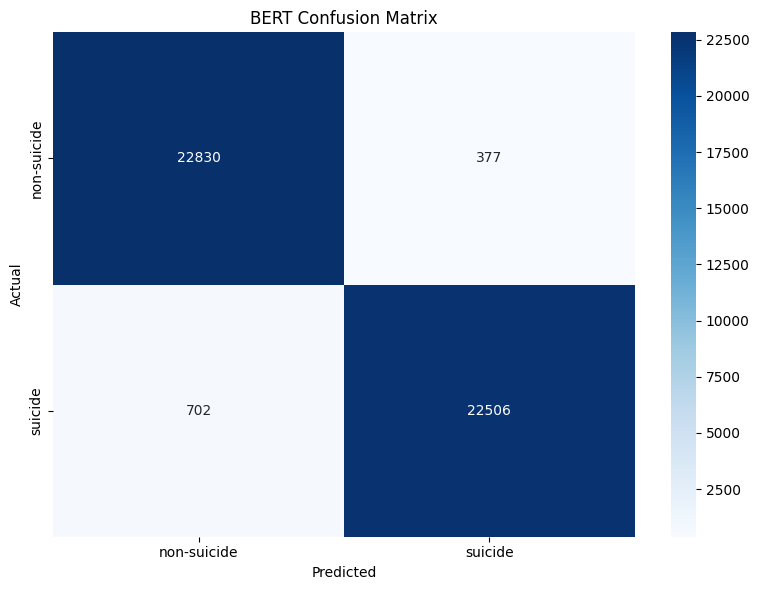

In [130]:
bert_model, bert_tokenizer, bert_metrics = run_bert_classification(x_train, x_test, y_train, y_test)

In [131]:
# Example of using the model for prediction
sample_texts = [
    "I feel hopeless and I don't want to live anymore",
    "I had a great day today and I'm looking forward to tomorrow",
    "Sometimes I think everyone would be better off without me",
    "I've been enjoying my new hobby and making new friends"
]

for text in sample_texts:
    result = predict_suicide_risk(text, bert_model, bert_tokenizer)
    print(f"Text: {text}")
    print(f"Prediction: {result['prediction']}")
    print(f"Confidence: {result['probability']:.4f}")
    print("-" * 50)

Text: I feel hopeless and I don't want to live anymore
Prediction: suicide
Confidence: 0.9980
--------------------------------------------------
Text: I had a great day today and I'm looking forward to tomorrow
Prediction: non-suicide
Confidence: 0.9990
--------------------------------------------------
Text: Sometimes I think everyone would be better off without me
Prediction: suicide
Confidence: 0.9997
--------------------------------------------------
Text: I've been enjoying my new hobby and making new friends
Prediction: non-suicide
Confidence: 1.0000
--------------------------------------------------


## Creating a Simple Suicidal Text Detection Interface

This section demonstrates how to create a simple interface for detecting suicidal text.

In [132]:
# Simple interface for suicide text detection
def suicide_detection_interface(model, tokenizer):
    print("===== Suicidal Text Detection Bot =====\n")
    print("Enter text to analyze (type 'exit' to quit):\n")
    
    while True:
        user_input = input("> ")
        if user_input.lower() == 'exit':
            print("Thank you for using the Suicidal Text Detection Bot.")
            break
            
        if not user_input.strip():
            print("Please enter some text to analyze.")
            continue
            
        # Predict suicide risk
        result = predict_suicide_risk(user_input, model, tokenizer)
        
        # Display result
        print("\nAnalysis Result:")
        print(f"Classification: {result['prediction']}")
        print(f"Confidence: {result['probability']:.2%}")
        
        # Provide appropriate response based on classification
        if result['prediction'] == 'suicide':
            print("\nNOTE: If you or someone you know is in crisis, please use these resources:")
            print("- National Suicide Prevention Lifeline: 1-800-273-8255")
            print("- Crisis Text Line: Text HOME to 741741")
        print("\n" + "-"*50 + "\n")

In [133]:
# Run the interface (uncomment to use)
suicide_detection_interface(bert_model, bert_tokenizer)

===== Suicidal Text Detection Bot =====

Enter text to analyze (type 'exit' to quit):


Analysis Result:
Classification: suicide
Confidence: 77.07%

NOTE: If you or someone you know is in crisis, please use these resources:
- National Suicide Prevention Lifeline: 1-800-273-8255
- Crisis Text Line: Text HOME to 741741

--------------------------------------------------


Analysis Result:
Classification: suicide
Confidence: 80.47%

NOTE: If you or someone you know is in crisis, please use these resources:
- National Suicide Prevention Lifeline: 1-800-273-8255
- Crisis Text Line: Text HOME to 741741

--------------------------------------------------

Please enter some text to analyze.
Please enter some text to analyze.
Please enter some text to analyze.
Please enter some text to analyze.
Please enter some text to analyze.
Please enter some text to analyze.
Please enter some text to analyze.
Please enter some text to analyze.


KeyboardInterrupt: Interrupted by user